# Exporting datafile

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_url = 'Mall_Customers.csv'

In [3]:
df = pd.read_csv(file_url)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.to_csv(r'C:\Users\redha\Study\Ass2\data\raw\Mall_Customers.csv', index=False)

# Data preparation

In [12]:
#saving a copy of dataframe
df_cleaned = df.copy()

In [13]:
#Removing the column CustomerID from the dataframe, saving new dataframe into the data/interim folder
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv(r'C:\Users\redha\Study\Ass2\data\interim\Mall_Customers.csv', index=False)

Splitting the dataset to train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [17]:
X_train_cleaned = X_train.copy()

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Creating the list containing the income

In [19]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [20]:
#setting a StandardCaller named sc
sc = StandardScaler()

In [21]:
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [22]:
#creating a list for Gender, naming cat_cols
cat_cols = ['Gender']

In [26]:
# Creating a variable called ohe, instantiate a OneHotEncoder with sparse=False and drop='first' and save it to ohe
ohe = OneHotEncoder(sparse=False, drop='first')

In [27]:
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

C:\Users\redha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
X_train_cleaned.reset_index(drop=True, inplace=True)

# Gaussian Mixture Model

In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [31]:
#Setting variable called model where KElbowVisualizer with an instantied KMeans and k=(2, 15) 
model = KElbowVisualizer(KMeans(), k=(2,15))

fitting the model

C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=14), k=(2, 15))

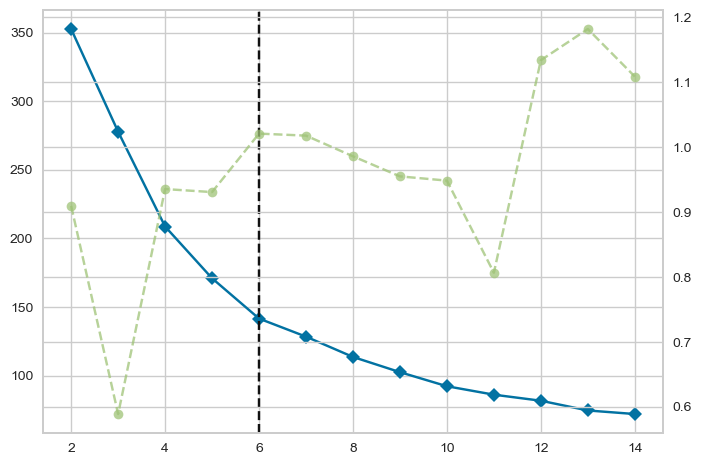

In [32]:
model.fit(X_train_cleaned)

In [33]:
n_clusters = model.elbow_value_

In [34]:
from sklearn.mixture import GaussianMixture

In [35]:
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [36]:
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.771416,-0.844380,-0.585705
1,0.0,-0.583546,-1.674190,-0.388498
2,0.0,0.386144,2.632916,-0.861795
3,0.0,-1.414709,0.143488,0.163682
4,1.0,-0.514282,0.617665,1.701898
...,...,...,...,...
155,0.0,0.316881,0.538635,-1.690066
156,0.0,-0.583546,0.499120,0.834186
157,0.0,-1.276181,0.103973,-0.309615
158,0.0,-1.276181,-0.212145,0.282006


In [37]:
#fir gmm with x_train_cleaned
gmm.fit(X_train_cleaned)

C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=6, random_state=8)

making predictions

In [39]:
gmm.predict(X_train_cleaned)

array([4, 4, 3, 0, 5, 2, 5, 0, 1, 1, 5, 1, 1, 4, 1, 4, 1, 5, 4, 5, 5, 0,
       1, 3, 5, 1, 0, 0, 1, 3, 5, 5, 0, 2, 2, 0, 1, 4, 0, 1, 4, 4, 5, 1,
       1, 3, 2, 1, 3, 2, 4, 1, 1, 0, 0, 3, 5, 2, 5, 1, 3, 1, 1, 5, 2, 0,
       0, 5, 5, 2, 3, 4, 4, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 4, 5, 3,
       3, 2, 1, 2, 1, 0, 3, 5, 1, 1, 1, 4, 3, 2, 3, 3, 0, 5, 4, 4, 5, 1,
       3, 0, 4, 2, 4, 2, 1, 1, 0, 2, 1, 1, 5, 3, 3, 1, 3, 5, 5, 1, 1, 0,
       2, 5, 1, 4, 4, 1, 1, 1, 5, 0, 5, 2, 1, 5, 0, 5, 1, 1, 1, 0, 5, 1,
       1, 3, 5, 0, 0, 5], dtype=int64)

In [40]:
#Transforming the first observation of X_train_cleaned into a dataframe as obs
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

making prediction on obs

In [41]:
gmm.predict(obs)

array([4], dtype=int64)

# Building PIpeline

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [44]:
#Creating a Pipeline called cat_transformer with one step that contains OneHotEncoder
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
#creating Preprosseccor that using Column Transformer to transform Num and Cat columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

Creating a Pipeline called gm_pipe that contains 2 steps preprocessor and another one that instantiate a GaussianMixture with the same parameters as before

In [47]:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [48]:
#fitting gmm_pipe with X_train
gmm_pipe.fit(X_train)

C:\Users\redha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\redha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('clustering',
                 GaussianMixture(n_components=6, random_state=8))])

making predirctions

In [49]:
gmm_pipe.predict(X_train)

array([4, 4, 3, 0, 5, 2, 5, 0, 1, 1, 5, 1, 1, 4, 1, 4, 1, 5, 4, 5, 5, 0,
       1, 3, 5, 1, 0, 0, 1, 3, 5, 5, 0, 2, 2, 0, 1, 4, 0, 1, 4, 4, 5, 1,
       1, 3, 2, 1, 3, 2, 4, 1, 1, 0, 0, 3, 5, 2, 5, 1, 3, 1, 1, 5, 2, 0,
       0, 5, 5, 2, 3, 4, 4, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 4, 5, 3,
       3, 2, 1, 2, 1, 0, 3, 5, 1, 1, 1, 4, 3, 2, 3, 3, 0, 5, 4, 4, 5, 1,
       3, 0, 4, 2, 4, 2, 1, 1, 0, 2, 1, 1, 5, 3, 3, 1, 3, 5, 5, 1, 1, 0,
       2, 5, 1, 4, 4, 1, 1, 1, 5, 0, 5, 2, 1, 5, 0, 5, 1, 1, 1, 0, 5, 1,
       1, 3, 5, 0, 0, 5], dtype=int64)

Transform the first observation of X_train into a dataframe, call it obs and make prediction on it

In [50]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([4], dtype=int64)

In [52]:
from joblib import dump

dump(gmm_pipe,  'model/gmm_pipeline.joblib')

['model/gmm_pipeline.joblib']